# Image Classification

Dataset: https://www.kaggle.com/datasets/misrakahmed/vegetable-image-dataset
- 21.000 images (**15 classes**) & 1.400 image each class
- Dimension 224x224 (*.jpg format)
- ~70% Training, ~15% Validation, and ~15% Testing

# Import Package

In [23]:
# ===============================
# 1. Import Package
# ===============================
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras import layers, models, optimizers
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

# Image Loader

In [3]:
# ===============================
# 2. Image Loader
# ===============================
base_dir = '/kaggle/input/vegetable-image-dataset/Vegetable Images'
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

# Data Preprocessing

In [4]:
# ===============================
# 3. Data Preprocessing
# ===============================
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False,
)

num_classes = train_generator.num_classes
class_labels = list(train_generator.class_indices.keys())

Found 15000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.


# Model Baseline

In [5]:
# ===============================
# 4. Build Lightweight CNN Model
# ===============================
def build_baseline_cnn(input_shape=(224, 224, 3), num_classes=15):
    model = models.Sequential([
        layers.Input(shape=input_shape),
        layers.Conv2D(32, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])

    model.compile(
        optimizer=optimizers.Adam(learning_rate=0.001),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

baseline_model = build_baseline_cnn(input_shape=(224, 224, 3), num_classes=num_classes)
baseline_model.summary()

2025-05-29 02:22:04.321006: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      11,075,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 15)                  │           1,935 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,170,895 (42.61 MB)

 Trainable params: 11,170,895 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

# Training Model

In [7]:
# ===============================
# 5. Train Model
# ===============================
history = baseline_model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 933s 2s/step - accuracy: 0.4551 - loss: 1.7759 - val_accuracy: 0.8483 - val_loss: 0.4938
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 907s 2s/step - accuracy: 0.8823 - loss: 0.3819 - val_accuracy: 0.8970 - val_loss: 0.3495
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 916s 2s/step - accuracy: 0.9340 - loss: 0.2130 - val_accuracy: 0.9157 - val_loss: 0.2923
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 904s 2s/step - accuracy: 0.9640 - loss: 0.1185 - val_accuracy: 0.9227 - val_loss: 0.2907
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 914s 2s/step - accuracy: 0.9736 - loss: 0.0854 - val_accuracy: 0.9197 - val_loss: 0.3087
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 909s 2s/step - accuracy: 0.9841 - loss: 0.0521 - val_accuracy: 0.9497 - val_loss: 0.2307
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 922s 2s/step - accuracy: 0.9850 - loss: 0.0437 - val_accuracy: 0.9333 - val_loss: 0.3020
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 913s 2s/step - accuracy: 0.9864 - loss: 0.0445 - val_accu

# Evaluasi Model Baseline

In [9]:
# ===============================
# 6. Evaluasi Model (Learning Curve) - Model Baseline
# ===============================
def plot_learning_curve(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(1, len(acc) + 1)
    plt.style.use('seaborn-v0_8-darkgrid')
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

    ax1.plot(epochs_range, acc, label='Train Accuracy', marker='o', linewidth=2, color='blue')
    ax1.plot(epochs_range, val_acc, label='Validation Accuracy', marker='s', linewidth=2, color='red')
    ax1.set_title('Training vs Validation Accuracy', fontsize=14)
    ax1.set_xlabel('Epoch', fontsize=12)
    ax1.set_ylabel('Accuracy', fontsize=12)
    ax1.legend()
    ax1.grid(True, linestyle='--', alpha=0.6)

    for x, y in zip(epochs_range, acc):
        ax1.text(x, y + 0.01, f'{y:.2f}', ha='center', fontsize=9, color='blue')
    for x, y in zip(epochs_range, val_acc):
        ax1.text(x, y + 0.01, f'{y:.2f}', ha='center', fontsize=9, color='red')

    ax2.plot(epochs_range, loss, label='Train Loss', marker='o', linewidth=2, color='blue')
    ax2.plot(epochs_range, val_loss, label='Validation Loss', marker='s', linewidth=2, color='red')
    ax2.set_title('Training vs Validation Loss', fontsize=14)
    ax2.set_xlabel('Epoch', fontsize=12)
    ax2.set_ylabel('Loss', fontsize=12)
    ax2.legend()
    ax2.grid(True, linestyle='--', alpha=0.6)

    for x, y in zip(epochs_range, loss):
        ax2.text(x, y + 0.01, f'{y:.2f}', ha='center', fontsize=9, color='blue')
    for x, y in zip(epochs_range, val_loss):
        ax2.text(x, y + 0.01, f'{y:.2f}', ha='center', fontsize=9, color='red')

    plt.tight_layout()
    plt.show()

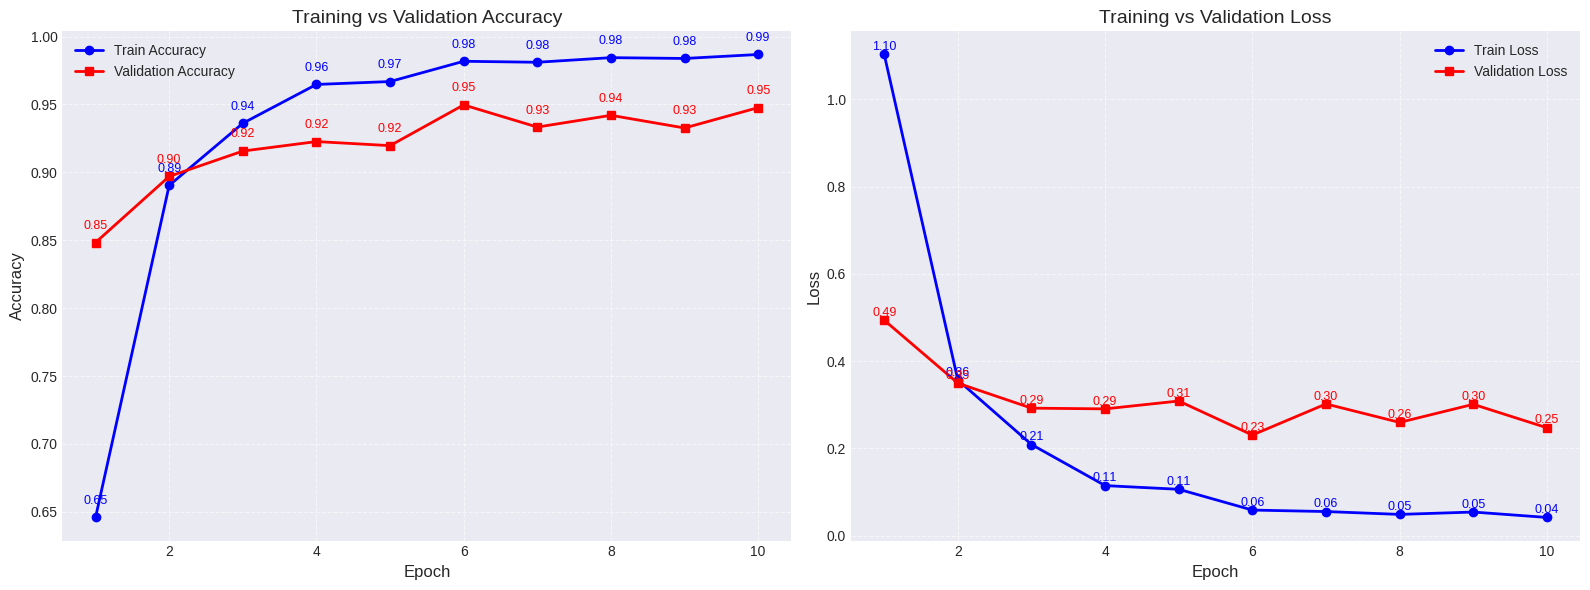

In [10]:
plot_learning_curve(history)

In [12]:
# ===============================
# 7. Evaluasi Model (Metrics)
# ===============================
test_generator.reset()
predictions = baseline_model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)
true_labels = test_generator.classes

accuracy = accuracy_score(true_labels, predicted_classes)
precision = precision_score(true_labels, predicted_classes, average='weighted')
recall = recall_score(true_labels, predicted_classes, average='weighted')
f1 = f1_score(true_labels, predicted_classes, average='weighted')

94/94 ━━━━━━━━━━━━━━━━━━━━ 54s 577ms/step


In [14]:
print("\n" + "="*30)
print("Test Set Evaluation Metrics")
print("="*30)
print(f" Accuracy : {accuracy * 100:7.2f}%")
print(f" Precision: {precision * 100:7.2f}%")
print(f" Recall   : {recall * 100:7.2f}%")
print(f" F1-Score : {f1 * 100:7.2f}%")
print("="*30 + "\n")


Test Set Evaluation Metrics
 Accuracy :   95.03%
 Precision:   95.24%
 Recall   :   95.03%
 F1-Score :   95.07%



In [15]:
report = classification_report(true_labels, predicted_classes, target_names=class_labels)
print("\nClassification Report:\n", report)


Classification Report:
               precision    recall  f1-score   support

        Bean       0.95      0.95      0.95       200
Bitter_Gourd       0.96      0.96      0.96       200
Bottle_Gourd       0.96      0.98      0.97       200
     Brinjal       0.97      0.89      0.92       200
    Broccoli       0.98      0.91      0.94       200
     Cabbage       0.84      0.96      0.90       200
    Capsicum       0.99      0.97      0.98       200
      Carrot       0.99      0.98      0.99       200
 Cauliflower       0.90      0.95      0.92       200
    Cucumber       1.00      0.93      0.96       200
      Papaya       0.97      0.97      0.97       200
      Potato       1.00      0.97      0.98       200
     Pumpkin       0.93      0.94      0.94       200
      Radish       0.97      0.98      0.98       200
      Tomato       0.89      0.91      0.90       200

    accuracy                           0.95      3000
   macro avg       0.95      0.95      0.95      3000
w

# Ekspolasi Model

In [19]:
# ===============================
# 8. Eksplorasi 1: LightWeight
# ===============================
def build_baseline_cnn(input_shape=(224, 224, 3), num_classes=num_classes):
    model = models.Sequential([
        layers.Conv2D(16, (3, 3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(32, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer=optimizers.Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

baseline_model_mini = build_baseline_cnn()
history_baseline_mini = baseline_model_mini.fit(
    train_generator,
    validation_data=val_generator,
    epochs=3
)

Epoch 1/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 407s 864ms/step - accuracy: 0.3687 - loss: 2.1850 - val_accuracy: 0.7923 - val_loss: 0.6640
Epoch 2/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 454s 890ms/step - accuracy: 0.8484 - loss: 0.4765 - val_accuracy: 0.8460 - val_loss: 0.5171
Epoch 3/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 402s 857ms/step - accuracy: 0.9436 - loss: 0.2038 - val_accuracy: 0.8550 - val_loss: 0.4867


In [20]:
# ===============================
# 9. Eksplorasi 2: LightWeight + Dropout
# ===============================
def build_dropout_model(input_shape=(224, 224, 3), num_classes=num_classes):
    model = models.Sequential([
        layers.Conv2D(16, (3, 3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(32, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer=optimizers.Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

dropout_model = build_dropout_model()
history_dropout = dropout_model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=3
)

Epoch 1/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 408s 865ms/step - accuracy: 0.3384 - loss: 2.2907 - val_accuracy: 0.7830 - val_loss: 0.7358
Epoch 2/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 441s 862ms/step - accuracy: 0.7233 - loss: 0.8568 - val_accuracy: 0.8720 - val_loss: 0.4437
Epoch 3/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 460s 901ms/step - accuracy: 0.8165 - loss: 0.5571 - val_accuracy: 0.9020 - val_loss: 0.3407


In [21]:
# ===============================
# 10. Eksplorasi 3: LightWeight + SGD Optimizer
# ===============================
def build_sgd_model(input_shape=(224, 224, 3), num_classes=num_classes):
    model = models.Sequential([
        layers.Conv2D(16, (3, 3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(32, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer=optimizers.SGD(learning_rate=0.01, momentum=0.9),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

sgd_model = build_sgd_model()
history_sgd = sgd_model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=3
)

Epoch 1/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 374s 793ms/step - accuracy: 0.3325 - loss: 1.9883 - val_accuracy: 0.6657 - val_loss: 1.0616
Epoch 2/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 386s 823ms/step - accuracy: 0.7573 - loss: 0.7514 - val_accuracy: 0.8057 - val_loss: 0.6190
Epoch 3/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 372s 793ms/step - accuracy: 0.8797 - loss: 0.3886 - val_accuracy: 0.8657 - val_loss: 0.4354


# Evaluasi Ekplorasi Model

In [33]:
# ===============================
# 11. Evaluasi Model (Learning Curve) - Eksplorasi Model
# ===============================
def plot_multiple_learning_curves(histories, labels):
    plt.figure(figsize=(16, 6))

    plt.subplot(1, 2, 1)
    for history, label in zip(histories, labels):
        val_acc = history.history['val_accuracy']
        plt.plot(val_acc, marker='o', label=f'{label} Val Acc')
        # Tambahkan angka
        for i, v in enumerate(val_acc):
            plt.text(i, v + 0.005, f'{v:.2f}', ha='center', fontsize=8)
    plt.title('Validation Accuracy Comparison')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    for history, label in zip(histories, labels):
        val_loss = history.history['val_loss']
        plt.plot(val_loss, marker='o', label=f'{label} Val Loss')
        # Tambahkan angka
        for i, v in enumerate(val_loss):
            plt.text(i, v + 0.005, f'{v:.2f}', ha='center', fontsize=8)
    plt.title('Validation Loss Comparison')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

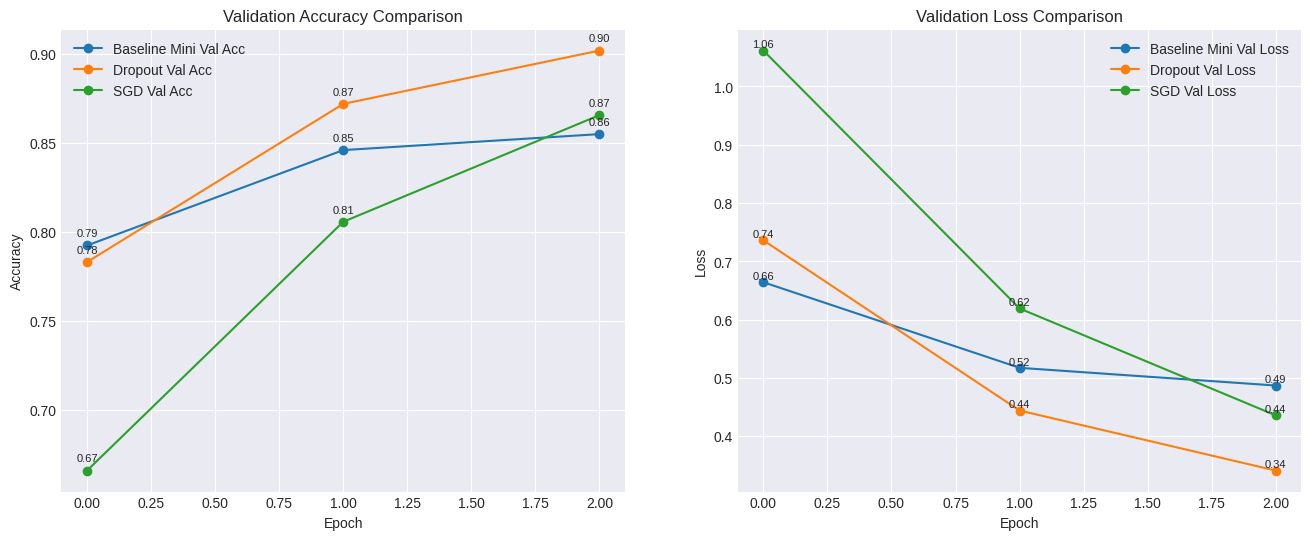

In [34]:
plot_multiple_learning_curves(
    histories=[history_baseline_mini, history_dropout, history_sgd],
    labels=['Baseline Mini', 'Dropout', 'SGD']
)

# Save Model

In [32]:
# ===============================
# 13. Save Model
# ===============================
baseline_model.save('/kaggle/working/baseline_model.h5')